<a href="https://colab.research.google.com/github/Franciscog2211/Proyecto-Final-Calidad-del-Aire-en-Curic-o/blob/main/Aire_Curico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo las Librerias necesarias para el desaroollo de mi proyecto.

In [53]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


Utilizo el link para descargar el archivo desde internet, para posteriormente visualizar un parte  del data-set 

In [54]:
url = "https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath="
data = pd.read_csv(url, delimiter=';')
data.head()

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,Unnamed: 5
0,120707,100,NaN,NaN,NaN,NaN
1,120707,200,NaN,NaN,NaN,NaN
2,120707,300,NaN,NaN,NaN,NaN
3,120707,400,NaN,NaN,NaN,NaN
4,120707,500,NaN,NaN,NaN,NaN


In [55]:
data.columns

Index(['FECHA (YYMMDD)', 'HORA (HHMM)', 'Registros validados',
       'Registros preliminares', 'Registros no validados', 'Unnamed: 5'],
      dtype='object')

 Modifica el dataset eliminando la columna sobrante del data set, esta operacion solo se realiza una vez en el dat set, si el data set no ha recibido modificaciones entonces esta fila es necesaria

In [56]:
 data = data.drop(data.columns[5], axis='columns')

Analizo el tipo de dato que tiene cada columna de mi data set, a la vez que obtengo informacion de los datos faltantes. 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FECHA (YYMMDD)          82415 non-null  int64 
 1   HORA (HHMM)             82415 non-null  int64 
 2   Registros validados     57743 non-null  object
 3   Registros preliminares  16484 non-null  object
 4   Registros no validados  2743 non-null   object
dtypes: int64(2), object(3)
memory usage: 3.1+ MB


como podemos ver nuestra columna de registros validados esta en formato object, por lo que deberemos modificar esto, además, las columnas de fecha estan separadas y con tipo de dato erroneo. 

In [58]:
data.rename(columns={'FECHA (YYMMDD)': 'Fecha', 
                           'HORA (HHMM)': 'Hora'}, inplace=True)

In [59]:
# Modifico el tipo para concadenar 20 a la fecha, de esta forma podemos  
data.Fecha= data.Fecha.astype(str)
data.Hora= data.Hora.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fecha                   82415 non-null  object
 1   Hora                    82415 non-null  object
 2   Registros validados     57743 non-null  object
 3   Registros preliminares  16484 non-null  object
 4   Registros no validados  2743 non-null   object
dtypes: object(5)
memory usage: 3.1+ MB


In [60]:
data["Year"] = "20"
data["Seconds"] = "00"
data.head()

,Fecha,Hora,Registros validados,Registros preliminares,Registros no validados,Year,Seconds
0,120707,100,NaN,NaN,NaN,20,00
1,120707,200,NaN,NaN,NaN,20,00
2,120707,300,NaN,NaN,NaN,20,00
3,120707,400,NaN,NaN,NaN,20,00
4,120707,500,NaN,NaN,NaN,20,00


In [61]:
data["Fecha_Cor"] = data["Year"] + data["Fecha"]
data["Hora_Cor"] = data["Hora"] + data["Seconds"]
data["Fecha_Completa"] = data["Fecha_Cor"] + " " + data["Hora_Cor"]

data.head()

,Fecha,Hora,Registros validados,Registros preliminares,Registros no validados,Year,Seconds,Fecha_Cor,Hora_Cor,Fecha_Completa
0,120707,100,NaN,NaN,NaN,20,00,20120707,10000,20120707 10000
1,120707,200,NaN,NaN,NaN,20,00,20120707,20000,20120707 20000
2,120707,300,NaN,NaN,NaN,20,00,20120707,30000,20120707 30000
3,120707,400,NaN,NaN,NaN,20,00,20120707,40000,20120707 40000
4,120707,500,NaN,NaN,NaN,20,00,20120707,50000,20120707 50000


In [62]:
data = data.drop(data.columns[[0,1,5,6]], axis='columns')
data.head()

,Registros validados,Registros preliminares,Registros no validados,Fecha_Cor,Hora_Cor,Fecha_Completa
0,NaN,NaN,NaN,20120707,10000,20120707 10000
1,NaN,NaN,NaN,20120707,20000,20120707 20000
2,NaN,NaN,NaN,20120707,30000,20120707 30000
3,NaN,NaN,NaN,20120707,40000,20120707 40000
4,NaN,NaN,NaN,20120707,50000,20120707 50000


In [63]:
data.rename(columns={'Registros validados': 'Registros_validados', 
                     'Registros preliminares': 'Registros_preliminares',
                     'Registros no validados': 'Registros_no_validados'
                     }, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Registros_validados     57743 non-null  object
 1   Registros_preliminares  16484 non-null  object
 2   Registros_no_validados  2743 non-null   object
 3   Fecha_Cor               82415 non-null  object
 4   Hora_Cor                82415 non-null  object
 5   Fecha_Completa          82415 non-null  object
dtypes: object(6)
memory usage: 3.8+ MB


In [64]:
data['Registros_validados'] = pd.to_numeric(data['Registros_validados'],errors = 'coerce')
data['Registros_preliminares'] = pd.to_numeric(data['Registros_preliminares'],errors = 'coerce')
data['Registros_no_validados'] = pd.to_numeric(data['Registros_no_validados'],errors = 'coerce')
data['Fecha_Cor'] = pd.to_numeric(data['Fecha_Cor'],errors = 'coerce')
data['Hora_Cor'] = pd.to_numeric(data['Hora_Cor'],errors = 'coerce')
#data.Registros_validados= data.Registros_validados.astype(float)
#data.Registros_preliminares= data.Registros_preliminares.astype(float)
#data.Registros_no_validados= data.Registros_no_validados.astype(float)
#data.Fecha_Cor= data.Fecha_Cor.astype(int)
#data.Hora_Cor= data.Hora_Cor.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Registros_validados     40941 non-null  float64
 1   Registros_preliminares  16467 non-null  float64
 2   Registros_no_validados  1105 non-null   float64
 3   Fecha_Cor               82415 non-null  int64  
 4   Hora_Cor                82415 non-null  int64  
 5   Fecha_Completa          82415 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 3.8+ MB


obtenemos informacion estadistica del data-set.

In [65]:
data.describe()

,Registros_validados,Registros_preliminares,Registros_no_validados,Fecha_Cor,Hora_Cor
count,40941.000000,16467.000000,1105.000000,8.241500e+04,82415.000000
mean,27.183361,24.830874,350.180090,2.016773e+07,115001.395377
std,40.346570,34.553066,458.511323,2.725206e+04,69221.546337
min,1.000000,1.000000,0.000000,2.012071e+07,0.000000
25%,8.000000,9.000000,2.000000,2.014111e+07,60000.000000
50%,14.000000,14.000000,16.000000,2.017032e+07,120000.000000
75%,30.000000,25.000000,1000.000000,2.019073e+07,175000.000000
max,612.000000,500.000000,1000.000000,2.021113e+07,230000.000000


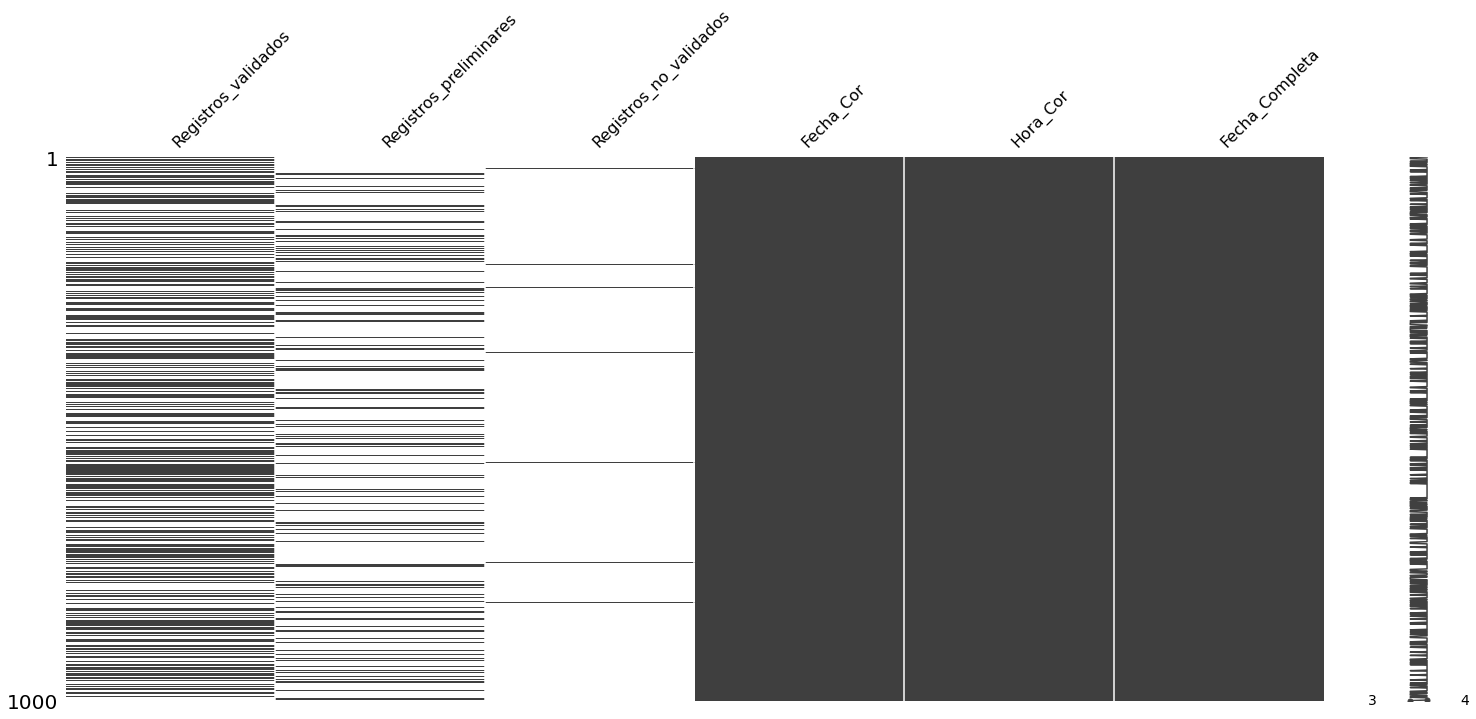

In [66]:
import missingno as msno

msno.matrix(data.sample(1000))

In [67]:
#borro los datos faltantes
data = data[data['Registros validados'].notna()]


KeyError: ignored

In [ ]:
print("SHAPE: ",data.shape)
print("SIZE: ",data.size)

In [ ]:
import missingno as msno

msno.matrix(data.sample(1000))


In [ ]:
#data2 = data.copy()
#data2.iloc[:,0].count() 
#for col in data2:
#    data2.drop(data2.loc[data2[col]=='NaN'].index, inplace=True)
    #data2 = data2.drop(data2[data2[col]!=999])
    
#data2.iloc[:,0].count()

In [ ]:
data.head()


In [ ]:
data.info()

In [ ]:
data = data[data['Registros validados'].notna()]
data.shape
